In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic_test = pd.read_csv('../data/titanic_test.csv')
titanic_train = pd.read_csv('../data/titanic_train.csv')
titanic = pd.concat([titanic_train, titanic_test], ignore_index=True, sort =False)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
titanic.shape

(1309, 12)

In [7]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
from pandas_profiling import ProfileReport

In [10]:
ProfileReport(titanic)

# Data munging/cleaning

Cabin has a very significant number of missing values at 77.5% (1014 values), followed by Survived at 31.9% (418) and Age at 20.1% (263 values).

Just going to remove the Age and Survived values that have nulls in them as to clean the dataset. Cabin going to remove entirely as too much data missing from the dataset to keep.

In [11]:
titanic_v0 = titanic[np.isfinite(titanic['Age'])]

In [12]:
titanic_v0.isnull().sum()

PassengerId      0
Survived       332
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          774
Embarked         2
dtype: int64

In [13]:
titanic_v1 = titanic_v0[np.isfinite(titanic_v0['Survived'])]

In [14]:
titanic_v1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [15]:
titanic_v2 = titanic_v1.drop('Cabin',axis=1)

In [16]:
titanic_v2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Lastly, just going to remove the Embarked rows with null values and that will be all for data cleaning/munging.

In [17]:
titanic_v3 = titanic_v2.dropna(axis=0,subset=['Embarked'])

In [18]:
titanic_v3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data cleaning done!

# Data exploration

Based on this profile report, there doesn't seem to be any strong linear correlation between the majority of the variables except for perhaps Pclass and Fare. There are weaker correlations existing but to a weak order. We'll investigate this relationship further below.

In [19]:
titanic_v3.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,Q


In [20]:
pclass = titanic.Pclass
fare = titanic.Fare

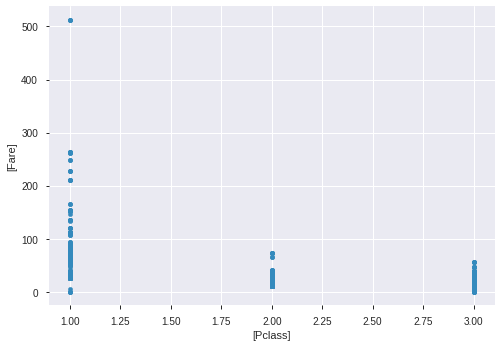

In [21]:
titanic_v3.plot.scatter(['Pclass'],['Fare'])

Text(0, 0.5, 'Fare')

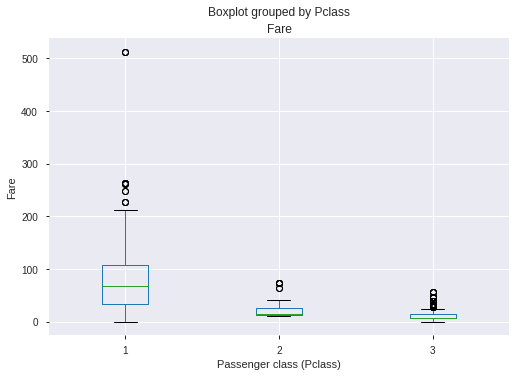

In [22]:
titanic_v3.boxplot('Fare',by='Pclass')
plt.xlabel('Passenger class (Pclass)')
plt.ylabel('Fare')


In [23]:
titanic_v3.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,88.048121,81.293524,0.0,33.8906,67.9500,107.04375,512.3292
2,173.0,21.471556,13.187429,10.5,13.0000,15.0458,26.00000,73.5000
3,355.0,13.229435,10.043158,0.0,7.7750,8.0500,15.74170,56.4958


It is clear that from the scatter plot, we can replot the data as a box plot. From there, we can see that for passenger class 3, it is clear the vast majority of the data is very tightly packed between 0 and 15 with many outliers. Passenger class 2 also has tightly packed data with a similar distribution to pclass 3 with the exception of not so many outliers. Passenger class distribution is postively skewed with outliers with a larger spread between the other two passenger classes by quite a margin. This suggests passenger class one was by far the most expensive fare with passenger class 2 and 3 being significantly cheaper but not much difference between classes 2 and 3.

From this, we can generate a new fare class to further investigate these variables.

In [24]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [25]:
titanic_v3 = titanic_v3.reset_index()

In [26]:
Fare = titanic_v3['Fare'].to_numpy()

In [27]:
fare_class = []
for i in range(len(Fare)):
    fare_class.append(create_fare_class(Fare[i]))

In [28]:
fare_class = np.array(fare_class)

In [29]:
titanic_v3 = pd.concat([titanic_v3, pd.DataFrame(fare_class)], axis=1)

In [30]:
titanic_v3.rename(columns={0:'FareClass'},inplace=True)

In [31]:
titanic_v3.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareClass
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,4
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,4
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4


In [32]:
ProfileReport(titanic_v3)

Want to explore FareClass and the vaiarbles SibSp and Parch.

In [33]:
titanic_v3.groupby('FareClass')[['SibSp','Parch']].describe()

SibSp                                               Parch  \
           count      mean       std  min  25%  50%  75%  max  count   
FareClass                                                              
1          201.0  0.965174  1.234415  0.0  0.0  1.0  1.0  5.0  201.0   
2          120.0  0.766667  1.010311  0.0  0.0  1.0  1.0  4.0  120.0   
3          155.0  0.348387  0.609381  0.0  0.0  0.0  1.0  3.0  155.0   
4          236.0  0.110169  0.418384  0.0  0.0  0.0  0.0  4.0  236.0   

                                                        
               mean       std  min  25%  50%  75%  max  
FareClass                                               
1          0.805970  1.112279  0.0  0.0  0.0  1.0  6.0  
2          0.741667  1.016633  0.0  0.0  0.0  1.0  5.0  
3          0.316129  0.621632  0.0  0.0  0.0  0.0  3.0  
4          0.033898  0.203468  0.0  0.0  0.0  0.0  2.0

Text(0, 0.5, 'FareClass')

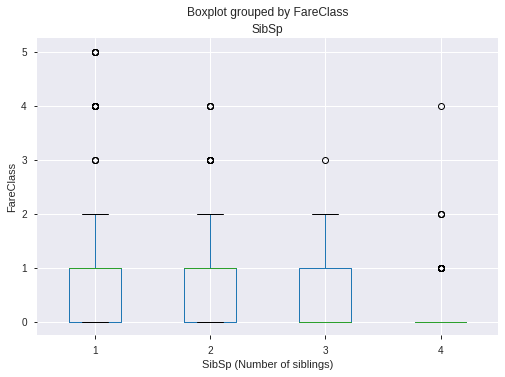

In [34]:
titanic_v3.boxplot('SibSp',by='FareClass')
plt.xlabel('SibSp (Number of siblings)')
plt.ylabel('FareClass')

Given Parch (number of children) has not a large spread of data and FareClass is a groupby variable, not so useful to explore any correlation between those variables. For SibSp (number of siblings) and Fare Class, is is clear that the majority of the data lies between the FareClass of zero and one. Besides that, given the breadth of the data is narrow, cannot glean much from this analysis.

However, exploring Pclass and Age might be interesting.

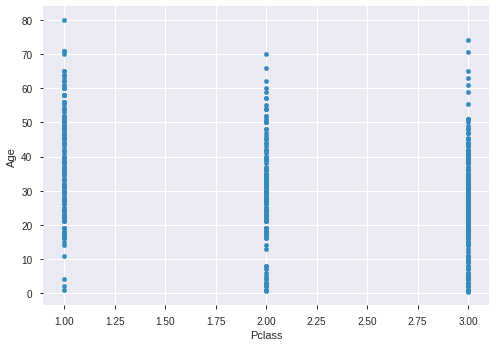

In [35]:
titanic_v3.plot.scatter('Pclass','Age')

Text(0, 0.5, 'Age')

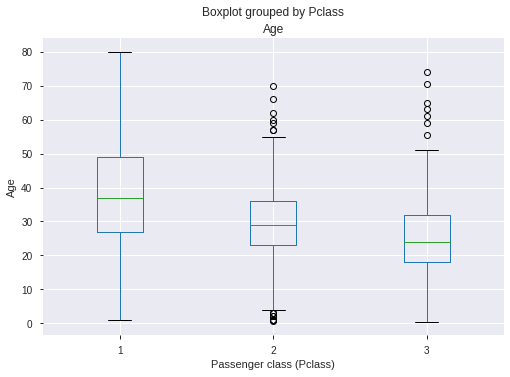

In [36]:
titanic_v3.boxplot('Age',by='Pclass')
plt.xlabel('Passenger class (Pclass)')
plt.ylabel('Age')

In [37]:
titanic_v3.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,38.105543,14.778904,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


Passenger class has more outliers as the passenger class increases from one to three. However, eachbox plot discounting the outliers is approximately symmetric for each Pclass. However, the mean age decreases with Pclass which suggests that a higher Pclass is more suited to a younger demographic. The existance of outliers though means that further analysis on the data may be required before any strong conclusions can be made.

Age tends to be younger with a postively skewed tail for people who went on the titanic with about 60% of the passengers male and 40% female. More people survived at 424 than 288 who didn't survive.